<a href="https://colab.research.google.com/github/npradeep96/IDRBlocks/blob/master/Generate_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount data

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/ML_for_IDRs'


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/ML_for_IDRs


In [ ]:
import pandas as pd
! pip install biopython
from Bio import SeqIO
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.4 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

## Make pandas dataset for IDR sequence-derived features and run a Neural Network for classification

In [ ]:
data_matrix_idr_features = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_for_IDRs/data_matrix.csv')
data_matrix_idr_features.head(10)


,Uniprot ID,IDR Sequence List,IDR Sequence Combined,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios
0,Q8WUM0,['FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL'],FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL,1.0,38.0,0.157895,0.000000,0.368379,0.157852,0.157852,0.242429,0.053462,14.499987,0.433333,0.426842,0.023065,0.095141,1.334377,10.371906
1,Q9NVP1,['NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQ...,NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQEA...,1.0,138.0,0.181159,0.181159,0.405402,0.361924,-0.000133,0.402122,0.181223,7.000000,0.340419,0.391667,0.139929,0.347977,-3.062043,9.565771
2,Q8N7H5,['DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQ...,DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQAQ...,1.0,102.0,0.078431,0.313725,0.414803,0.395195,-0.231872,0.253720,0.121241,3.609375,0.314270,0.315980,0.070581,0.278184,14.806040,9.189393
3,Q8WUA4,['SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRR...,SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRRLP...,2.0,255.0,0.164706,0.149020,0.479416,0.314710,0.015757,0.320499,0.070002,8.750000,0.371373,0.448118,0.097659,0.304710,-3.284487,9.121233
4,Q8WVC0,['ADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSES...,ADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSESDQ...,3.0,456.0,0.120614,0.346491,0.509185,0.471904,-0.220657,0.226271,0.102102,3.882812,0.276827,0.360570,0.084354,0.372802,127.322525,9.007168
5,P55884,['QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEA...,QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAAG...,1.0,157.0,0.050955,0.248408,0.446737,0.300240,-0.196211,0.111375,0.037347,3.500000,0.389314,0.435223,0.024696,0.221737,21.077413,8.627768
6,Q9Y5Q8,['LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSEN...,LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSENEM...,1.0,54.0,0.055556,0.444444,0.518157,0.499638,-0.388703,0.604509,0.300250,3.281250,0.328189,0.349630,0.149423,0.247181,11.883401,7.997080
7,P55081,"['SVPSALMKQPPIQSTAGAVPVRNEKG', 'VSGKRPDYAPMESS...",SVPSALMKQPPIQSTAGAVPVRNEKGVSGKRPDYAPMESSDEEDEE...,2.0,178.0,0.146067,0.331461,0.528732,0.478170,-0.184310,0.343609,0.075862,3.937500,0.327778,0.392191,0.138866,0.404138,17.644652,7.713330
8,Q9UBU9,['ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGS...,ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGSGI...,1.0,84.0,0.226190,0.178571,0.466120,0.406597,0.049555,0.325540,0.053614,10.062500,0.298942,0.354048,0.123157,0.378316,-1.146155,7.690745
9,Q8IX01,"['SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSI', 'RATTGTQT...",SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSIRATTGTQTLLSSGT...,3.0,198.0,0.070707,0.202020,0.417808,0.276394,-0.128340,0.290060,0.155521,3.937500,0.390685,0.405758,0.066557,0.229458,4.407218,7.650883


In [ ]:
data_matrix_idr_features.describe()

,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios
count,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000
mean,2.293668,190.222162,0.143337,0.155362,0.416545,0.301813,-0.009218,0.248728,0.170126,7.562398,0.355894,0.408230,0.059863,0.242669,3.667438,0.252371
std,2.106919,267.544894,0.082754,0.100643,0.105166,0.128833,0.131495,0.147247,0.121777,3.204692,0.053241,0.050111,0.042068,0.118429,24.864038,2.981080
min,1.000000,25.000000,0.000000,0.000000,0.052521,0.000000,-0.759432,-1.000000,0.005422,1.750000,0.143928,0.183107,0.000000,0.000000,-55.427329,-6.835415
25%,1.000000,48.000000,0.084389,0.086957,0.352250,0.213889,-0.064195,0.170169,0.101439,4.375000,0.325178,0.379016,0.030376,0.161390,-0.727035,-1.862596
50%,2.000000,103.000000,0.132796,0.137931,0.413697,0.290191,0.002304,0.226925,0.144121,7.000000,0.360875,0.405771,0.049537,0.234057,0.056790,0.119152
75%,3.000000,226.000000,0.187500,0.200000,0.479737,0.375887,0.058752,0.308180,0.204779,10.062500,0.391704,0.435684,0.078264,0.310657,2.041941,2.414201
max,24.000000,3108.000000,0.514286,0.760000,0.836311,0.836311,0.463884,1.000000,1.192246,14.499987,0.534156,0.671600,0.349907,0.818542,839.796075,10.371906


In [ ]:
# Convert IDR counts to log2 IDR counts
data_matrix_idr_features['log2 IDR Count'] = np.log2(data_matrix_idr_features['IDR Count'])

# Convert total length of IDR to log10 length of IDR
data_matrix_idr_features['log10 Total IDR Length'] = np.log10(data_matrix_idr_features['Total IDR Length'])

# Drop the sequences that have absurdly high SCD
data_matrix_idr_features = data_matrix_idr_features[(data_matrix_idr_features['SCD']>-25.0)*(data_matrix_idr_features['SCD']<25.0)]

# Select only the protein sequences that have a partition ratio of > 2 or < -2 for classification
def assign_labels(pr):
  if pr > 2.0:
    return 1
  elif pr < -2.0:
    return 0
  else:
    return -1

data_matrix_idr_features['Enrichment Label'] = data_matrix_idr_features['Log Partition Ratios'].apply(assign_labels)

# Drop the columns that contain Enrichment Label of -1
data_matrix_idr_features = data_matrix_idr_features[data_matrix_idr_features['Enrichment Label'] != -1]

data_matrix_idr_features.head(10)


<ipython-input-9-b90914341a67>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix_idr_features['Enrichment Label'] = data_matrix_idr_features['Log Partition Ratios'].apply(assign_labels)


,Uniprot ID,IDR Sequence List,IDR Sequence Combined,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,...,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios,log2 IDR Count,log10 Total IDR Length,Enrichment Label
0,Q8WUM0,['FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL'],FPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPL,1.0,38.0,0.157895,0.000000,0.368379,0.157852,0.157852,...,14.499987,0.433333,0.426842,0.023065,0.095141,1.334377,10.371906,0.000000,1.579784,1
1,Q9NVP1,['NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQ...,NLTLSETQNGDVSEETMGSRKVKKSKQKPMNVGLSETQNGGMSQEA...,1.0,138.0,0.181159,0.181159,0.405402,0.361924,-0.000133,...,7.000000,0.340419,0.391667,0.139929,0.347977,-3.062043,9.565771,0.000000,2.139879,1
2,Q8N7H5,['DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQ...,DKSGSGEDESSEDEARAARDKEEIFGSDADSEDDADSDDEDRGQAQ...,1.0,102.0,0.078431,0.313725,0.414803,0.395195,-0.231872,...,3.609375,0.314270,0.315980,0.070581,0.278184,14.806040,9.189393,0.000000,2.008600,1
3,Q8WUA4,['SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRR...,SPGQEVLNQLDVKTSSEMTSAEASVEMSLPTPLPGFEDSPDQRRLP...,2.0,255.0,0.164706,0.149020,0.479416,0.314710,0.015757,...,8.750000,0.371373,0.448118,0.097659,0.304710,-3.284487,9.121233,1.000000,2.406540,1
5,P55884,['QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEA...,QDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAAG...,1.0,157.0,0.050955,0.248408,0.446737,0.300240,-0.196211,...,3.500000,0.389314,0.435223,0.024696,0.221737,21.077413,8.627768,0.000000,2.195900,1
6,Q9Y5Q8,['LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSEN...,LFSSSAKADGGKEQLTYESGEDEEDEEEEEEEEEDFKPSDGSENEM...,1.0,54.0,0.055556,0.444444,0.518157,0.499638,-0.388703,...,3.281250,0.328189,0.349630,0.149423,0.247181,11.883401,7.997080,0.000000,1.732394,1
7,P55081,"['SVPSALMKQPPIQSTAGAVPVRNEKG', 'VSGKRPDYAPMESS...",SVPSALMKQPPIQSTAGAVPVRNEKGVSGKRPDYAPMESSDEEDEE...,2.0,178.0,0.146067,0.331461,0.528732,0.478170,-0.184310,...,3.937500,0.327778,0.392191,0.138866,0.404138,17.644652,7.713330,1.000000,2.250420,1
8,Q9UBU9,['ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGS...,ADEGKSYSEHDDERVNFPQRKKKGRGPFRWKYGEGNRRSGRGGSGI...,1.0,84.0,0.226190,0.178571,0.466120,0.406597,0.049555,...,10.062500,0.298942,0.354048,0.123157,0.378316,-1.146155,7.690745,0.000000,1.924279,1
9,Q8IX01,"['SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSI', 'RATTGTQT...",SGSVAHSRDAGREGLRSDVFPGPSFRSSNPSIRATTGTQTLLSSGT...,3.0,198.0,0.070707,0.202020,0.417808,0.276394,-0.128340,...,3.937500,0.390685,0.405758,0.066557,0.229458,4.407218,7.650883,1.584963,2.296665,1
10,O75643,['RMGDKAQRTKPQMQEERRAKRRKRDEDRHD'],RMGDKAQRTKPQMQEERRAKRRKRDEDRHD,1.0,30.0,0.400000,0.233333,0.671853,0.638519,0.172145,...,11.812500,0.184815,0.414667,0.122409,0.539486,0.211554,7.646523,0.000000,1.477121,1


In [ ]:
data_matrix_idr_features.describe()

,IDR Count,Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Log Partition Ratios,log2 IDR Count,log10 Total IDR Length,Enrichment Label
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,2.187912,171.602198,0.143988,0.155992,0.417364,0.302977,-0.009276,0.244847,0.173121,7.450670,0.354973,0.407909,0.060274,0.244460,1.122316,0.415538,0.797172,2.018353,0.537363
std,1.827208,221.565527,0.082870,0.098521,0.105478,0.128661,0.128428,0.157175,0.121607,3.154125,0.052725,0.049019,0.044796,0.120334,5.011959,3.968001,0.909945,0.414190,0.498876
min,1.000000,25.000000,0.000000,0.000000,0.093750,0.000000,-0.759432,-1.000000,0.006680,1.750000,0.143928,0.183107,0.000000,0.000000,-23.759160,-6.835415,0.000000,1.397940,0.000000
25%,1.000000,47.000000,0.085382,0.091243,0.354140,0.215698,-0.063214,0.166276,0.103216,4.375000,0.325059,0.379406,0.029113,0.159912,-0.780215,-3.320583,0.000000,1.672098,0.000000
50%,2.000000,96.500000,0.133333,0.140518,0.414331,0.291191,0.000000,0.227097,0.146009,7.000000,0.358428,0.405843,0.049394,0.235649,0.056107,2.251694,1.000000,1.984521,1.000000
75%,3.000000,205.000000,0.188568,0.202461,0.479334,0.374882,0.059136,0.305297,0.206152,10.062500,0.389969,0.435891,0.075584,0.313957,1.828678,3.635604,1.584963,2.311754,1.000000
max,16.000000,2263.000000,0.514286,0.760000,0.836311,0.836311,0.463884,1.000000,0.918346,14.499987,0.533333,0.610800,0.349907,0.818542,24.966790,10.371906,4.000000,3.354685,1.000000


In [ ]:
# Derive a dataset from above for training a neural network
columns = ['Uniprot ID', 'log2 IDR Count', 'log10 Total IDR Length', 'Fraction Positive',
           'Fraction Negative', 'Fraction Expanding', 'FCR', 'NCPR', 'Kappa',
           'Omega', 'Isoelectric Point', 'Uversky Hydropathy', 'PPII Propensity',
           'Delta', 'Delta Max', 'SCD', 'Enrichment Label']

data_matrix_nn = data_matrix_idr_features[columns]

data_matrix_nn.head(10)


,Uniprot ID,log2 IDR Count,log10 Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Enrichment Label
0,Q8WUM0,0.000000,1.579784,0.157895,0.000000,0.368379,0.157852,0.157852,0.242429,0.053462,14.499987,0.433333,0.426842,0.023065,0.095141,1.334377,1
1,Q9NVP1,0.000000,2.139879,0.181159,0.181159,0.405402,0.361924,-0.000133,0.402122,0.181223,7.000000,0.340419,0.391667,0.139929,0.347977,-3.062043,1
2,Q8N7H5,0.000000,2.008600,0.078431,0.313725,0.414803,0.395195,-0.231872,0.253720,0.121241,3.609375,0.314270,0.315980,0.070581,0.278184,14.806040,1
3,Q8WUA4,1.000000,2.406540,0.164706,0.149020,0.479416,0.314710,0.015757,0.320499,0.070002,8.750000,0.371373,0.448118,0.097659,0.304710,-3.284487,1
5,P55884,0.000000,2.195900,0.050955,0.248408,0.446737,0.300240,-0.196211,0.111375,0.037347,3.500000,0.389314,0.435223,0.024696,0.221737,21.077413,1
6,Q9Y5Q8,0.000000,1.732394,0.055556,0.444444,0.518157,0.499638,-0.388703,0.604509,0.300250,3.281250,0.328189,0.349630,0.149423,0.247181,11.883401,1
7,P55081,1.000000,2.250420,0.146067,0.331461,0.528732,0.478170,-0.184310,0.343609,0.075862,3.937500,0.327778,0.392191,0.138866,0.404138,17.644652,1
8,Q9UBU9,0.000000,1.924279,0.226190,0.178571,0.466120,0.406597,0.049555,0.325540,0.053614,10.062500,0.298942,0.354048,0.123157,0.378316,-1.146155,1
9,Q8IX01,1.584963,2.296665,0.070707,0.202020,0.417808,0.276394,-0.128340,0.290060,0.155521,3.937500,0.390685,0.405758,0.066557,0.229458,4.407218,1
10,O75643,0.000000,1.477121,0.400000,0.233333,0.671853,0.638519,0.172145,0.226899,0.255478,11.812500,0.184815,0.414667,0.122409,0.539486,0.211554,1


In [ ]:
data_matrix_nn.describe()

,log2 IDR Count,log10 Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD,Enrichment Label
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,0.797172,2.018353,0.143988,0.155992,0.417364,0.302977,-0.009276,0.244847,0.173121,7.450670,0.354973,0.407909,0.060274,0.244460,1.122316,0.537363
std,0.909945,0.414190,0.082870,0.098521,0.105478,0.128661,0.128428,0.157175,0.121607,3.154125,0.052725,0.049019,0.044796,0.120334,5.011959,0.498876
min,0.000000,1.397940,0.000000,0.000000,0.093750,0.000000,-0.759432,-1.000000,0.006680,1.750000,0.143928,0.183107,0.000000,0.000000,-23.759160,0.000000
25%,0.000000,1.672098,0.085382,0.091243,0.354140,0.215698,-0.063214,0.166276,0.103216,4.375000,0.325059,0.379406,0.029113,0.159912,-0.780215,0.000000
50%,1.000000,1.984521,0.133333,0.140518,0.414331,0.291191,0.000000,0.227097,0.146009,7.000000,0.358428,0.405843,0.049394,0.235649,0.056107,1.000000
75%,1.584963,2.311754,0.188568,0.202461,0.479334,0.374882,0.059136,0.305297,0.206152,10.062500,0.389969,0.435891,0.075584,0.313957,1.828678,1.000000
max,4.000000,3.354685,0.514286,0.760000,0.836311,0.836311,0.463884,1.000000,0.918346,14.499987,0.533333,0.610800,0.349907,0.818542,24.966790,1.000000


In [ ]:
# Scale the data from

X = data_matrix_nn[columns[1:-1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)
X_scaled = pd.DataFrame(X_scaled, columns=columns[1:-1])
X_scaled.describe()

,log2 IDR Count,log10 Total IDR Length,Fraction Positive,Fraction Negative,Fraction Expanding,FCR,NCPR,Kappa,Omega,Isoelectric Point,Uversky Hydropathy,PPII Propensity,Delta,Delta Max,SCD
count,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,9.100000e+02,910.000000
mean,7.808162e-17,-8.120488e-16,2.810938e-16,-5.465713e-17,3.357510e-16,-1.561632e-17,1.561632e-17,-1.483551e-16,-1.639714e-16,-6.246530e-17,2.342449e-16,-3.904081e-16,1.561632e-17,4.684897e-17,0.000000
std,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550e+00,1.000550
min,-8.765481e-01,-1.498720e+00,-1.738479e+00,-1.584198e+00,-3.069772e+00,-2.356149e+00,-5.844285e+00,-7.924495e+00,-1.369438e+00,-1.808364e+00,-4.004970e+00,-4.588527e+00,-1.346258e+00,-2.032621e+00,-4.967151
25%,-8.765481e-01,-8.364421e-01,-7.075931e-01,-6.575606e-01,-5.997416e-01,-6.787363e-01,-4.202175e-01,-5.001729e-01,-5.751622e-01,-9.756624e-01,-5.676692e-01,-5.817851e-01,-6.960065e-01,-7.029958e-01,-0.379807
50%,2.230238e-01,-8.172654e-02,-1.286392e-01,-1.571422e-01,-2.877076e-02,-9.165836e-02,7.227077e-02,-1.129965e-01,-2.230728e-01,-1.429612e-01,6.557053e-02,-4.217954e-02,-2.430192e-01,-7.326008e-02,-0.212850
75%,8.662321e-01,7.087622e-01,5.382559e-01,4.719235e-01,5.878434e-01,5.591804e-01,5.329841e-01,3.848125e-01,2.717689e-01,8.285236e-01,6.641072e-01,5.711383e-01,3.419440e-01,5.778536e-01,0.141013
max,3.521739e+00,3.228149e+00,4.470902e+00,6.134109e+00,3.974087e+00,4.147554e+00,3.686280e+00,4.807181e+00,6.131519e+00,2.236181e+00,3.384711e+00,4.141276e+00,6.469109e+00,4.773345e+00,4.760132


In [ ]:
# Generate dataset
class IDRFeaturesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(np.array(X))  # store X as a pytorch Tensor
        self.y = torch.Tensor(np.array(y))  # store y as a pytorch Tensor
        self.len = len(self.X)              # number of samples in the data

    def __getitem__(self, index):
        # your implementation here:
        return self.X[index], self.y[index]
    def __len__(self):
        return self.len

# Assign data
X_scaled = X_scaled[columns[1:-1]]
y = data_matrix_nn['Enrichment Label'].values

# Do a test:train 20:80 split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, train_size=0.8)
# Divide the train set into a validation:train 10:90 split
X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, train_size=0.8)

#Build Dataset
train_data = IDRFeaturesDataset(X_train, y_train) # fill in code here
val_data = IDRFeaturesDataset(X_val, y_val) # fill in code here
test_data = IDRFeaturesDataset(X_test, y_test) # fill in code here

# Build DataLoader
batch_size = 8
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
# Set up model

class IDRFeatureNN(torch.nn.Module) :
    def __init__(self, hidden_dim, dropout_prob, input_dim=15) :
        super().__init__()

        # Define a MLP regressor
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_prob),
            nn.Linear(hidden_dim, 1)
        )

        # Define a sigmoid transform
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        # Pass output into a MLP
        mlp_out = self.mlp(x)

        # Transform output into probabilites
        proba = self.sigmoid(mlp_out)

        # Return probabilities
        return proba

In [ ]:
# Set up model

class IDRFeatureNN_fully_connected(torch.nn.Module) :
    def __init__(self, hidden_dim, input_dim=15) :
        super().__init__()

        # Define a MLP regressor
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

        # Define a sigmoid transform
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        # Pass output into a MLP
        mlp_out = self.mlp(x)

        # Transform output into probabilites
        proba = self.sigmoid(mlp_out)

        # Return probabilities
        return proba

In [ ]:
# Test your ouput on a batch

# Send your batch to a GPU
X_batch, y_batch = next(iter(train_loader))
X_batch = X_batch.to("cpu")
y_batch = y_batch.to("cpu")

clf = IDRFeatureNN(hidden_dim=8, dropout_prob=0.5).to('cpu')
print(clf(X_batch).shape)

torch.Size([8, 1])


In [ ]:
def train(model, dataloader, optimizer, device):

    '''
    A function to train on the entire dataset for one epoch.

    Args:
        model (torch.nn.Module): Your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer): Optimizer object to interface gradient calculation and optimization
        device (str): Your device

    Returns:
        float: loss averaged over all the batches

    '''

    batch_loss = []
    model.train() # Set model to training mode

    for batch in dataloader:
        X, label = batch
        X = X.to(device)
        label = label.to(device)

        # train your model on each batch here
        pred = model(X)
        loss = nn.functional.binary_cross_entropy(pred.squeeze(),label.squeeze())
        batch_loss.append(loss.item())

        # run backpropagation given the loss you defined
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return np.array(batch_loss).mean()


def validate(model, dataloader, device):

    '''
    A function to validate on the validation dataset for one epoch.

    Args:
        model (torch.nn.Module): Your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the validation data
        device (str): Your device

    Returns:
        float: loss averaged over all the batches

    '''

    val_loss = []
    model.eval() # Set model to evaluation mode
    with torch.no_grad():
        for batch in dataloader:
            X, label = batch
            X = X.to(device)
            label = label.to(device)

            # validate your model on each batch here
            pred = model(X)
            loss = nn.functional.binary_cross_entropy(pred.squeeze(),label.squeeze())
            val_loss.append(loss.item())

    return np.array(val_loss).mean()

def evaluate(model, dataloader, device):

    '''
    A function to return the classification probabilities and true labels (for evaluation).

    Args:
        model (torch.nn.Module): your sequence classifier
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        device (str): Your device

    Returns:
        (np.array, np.array): true labels, predicted probabilities
    '''

    pred_prob = []
    labels = []
    with torch.no_grad():
        model.eval()
        for batch in dataloader:
            epoch_loss = []
            X, label = batch

            X = X.to(device)
            label = label.to(device)

            # evaluate your model here
            pred = model(X)
            pred_prob += pred.cpu().numpy().ravel().tolist()
            labels += label.cpu().numpy().ravel().tolist()

    return labels, pred_prob

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Progress: 100%|██████████| 500/500 [01:29<00:00,  5.57it/s, train_loss=0.607, val_loss=0.619]


-------------------Performance metrics -----------
Number of hidden layers:  16
Dropout probability:  0.2
Learning Rate: 0.01


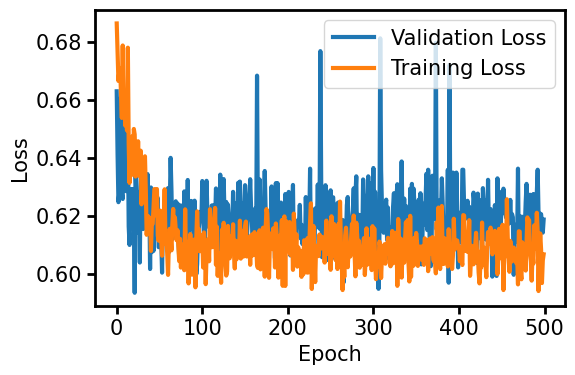

AUC on the test dataset is 0.6859407644094875.
Confusion Matrix:
[[57 22]
 [37 66]]
---------------------------------------------


In [ ]:
for hidden_layers in [16]:
  for prob_dropout in [0.2]:
    for lr in [0.01]:

      device = 'cuda:0'
      model = IDRFeatureNN(hidden_dim=hidden_layers, dropout_prob=prob_dropout).to(device)

      optimizer = torch.optim.Adam(list(model.parameters()), lr=lr)
      scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, factor=0.5)

      val_loss_curve = []
      train_loss_curve = []

      # Use tqdm for progress bar
      tqdm_progress =  tqdm(range(500), desc="Progress")

      for epoch in tqdm_progress:
          # Compute train your model on training data
          epoch_loss = train(model, train_loader, optimizer,  device=device)

          # Validate your on validation data
          val_loss = validate(model, val_loader, device=device)

          # Record train and loss performance
          train_loss_curve.append(epoch_loss)
          val_loss_curve.append(val_loss)

          # The learning rate scheduler record the validation loss
          scheduler.step(val_loss)
          tqdm_progress.set_postfix(train_loss=f'{epoch_loss:.3f}', val_loss=f'{val_loss:.3f}', refresh=True)

      print ('-------------------Performance metrics -----------')
      print('Number of hidden layers: ', str(hidden_layers))
      print('Dropout probability: ', str(prob_dropout))
      print('Learning Rate:', str(lr))
      fig, ax = plt.subplots(figsize=(6, 4))
      ax.plot(val_loss_curve, label='Validation Loss')
      ax.plot(train_loss_curve, label='Training Loss')
      ax.set_xlabel('Epoch')
      ax.set_ylabel('Loss')
      ax.legend(loc='upper right')
      fig.tight_layout()
      plt.show()

      ################ Code #################
      labels, pred_prob = evaluate(model, test_loader, device)
      test_score = roc_auc_score(labels, pred_prob)
      ################ Code #################

      print("AUC on the test dataset is {}.".format(test_score) )

      pred_label = np.zeros(len(pred_prob))
      for i in range(len(pred_prob)):
        if pred_prob[i] >= 0.5:
          pred_label[i] = 1
        else:
          pred_label[i] = 0
      conf_matrix = confusion_matrix(labels, pred_label)

      # Print confusion matrix
      print("Confusion Matrix:")
      print(conf_matrix)

      print ('---------------------------------------------')

In [ ]:
# ! pip install shap
import shap

# # Convert numpy arrays to PyTorch tensors
# X_train_tensor = torch.tensor(X_train).float()
# X_test_tensor = torch.tensor(X_test).float()

# # Define a function to get SHAP values from the PyTorch model
# def get_shap_values(input_data):
#     # Create a SHAP explainer using the PyTorch model
#     explainer = shap.Explainer(model, input_data)

#     # Compute SHAP values
#     shap_values = explainer(input_data)
#     return shap_values

# # Compute SHAP values for the training data
# shap_values_train = get_shap_values(X_train_tensor)

# # Training data as dataframe
# df_train = pd.DataFrame(X_train, columns = ['log2 IDR Count', 'log10 Total IDR Length', 'Fraction Positive',
#            'Fraction Negative', 'Fraction Expanding', 'FCR', 'NCPR', 'Kappa',
#            'Omega', 'Isoelectric Point', 'Uversky Hydropathy', 'PPII Propensity',
#            'Delta', 'Delta Max', 'SCD'])

# # Plot the SHAP values
# shap.summary_plot(shap_values_train, df_train)
# plt.show()

# from torch import Variable

# Get features
train_features_df = pd.DataFrame(X_train, columns = ['log2 IDR Count', 'log10 Total IDR Length', 'Fraction Positive',
            'Fraction Negative', 'Fraction Expanding', 'FCR', 'NCPR', 'Kappa',
           'Omega', 'Isoelectric Point', 'Uversky Hydropathy', 'PPII Propensity',
           'Delta', 'Delta Max', 'SCD']) # pandas dataframe
test_features_df = pd.DataFrame(X_test, columns = ['log2 IDR Count', 'log10 Total IDR Length', 'Fraction Positive',
            'Fraction Negative', 'Fraction Expanding', 'FCR', 'NCPR', 'Kappa',
           'Omega', 'Isoelectric Point', 'Uversky Hydropathy', 'PPII Propensity',
           'Delta', 'Delta Max', 'SCD']) # pandas dataframe



# Define function to wrap model to transform data to tensor
f = lambda x: model(torch.Tensor(x).to(device='cuda:0')).detach()

# Convert my pandas dataframe to numpy
data = test_features_df.to_numpy(dtype=np.float32)

# The explainer doesn't like tensors, hence the f function
explainer = shap.KernelExplainer(f, data)

# Get the shap values from my test data
shap_values = explainer.shap_values(data)

# Enable the plots in jupyter
shap.initjs()

feature_names = test_features_df.columns
# Plots
#shap.force_plot(explainer.expected_value, shap_values[0], feature_names)
#shap.dependence_plot("b1_price_avg", shap_values[0], data, feature_names)
shap.summary_plot(shap_values[0], data, feature_names)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Progress: 100%|██████████| 500/500 [01:14<00:00,  6.71it/s, train_loss=0.600, val_loss=0.619]


-------------------Performance metrics -----------
Number of hidden layers:  8
Dropout probability:  0.5
Learning Rate: 0.001


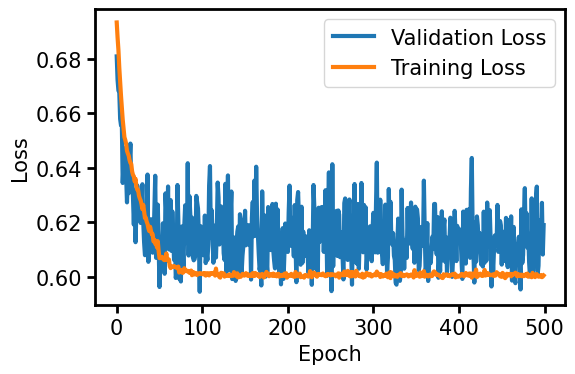

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC on the test dataset is 0.6329896907216496.
Confusion Matrix:
[[51 34]
 [35 62]]
---------------------------------------------


Progress: 100%|██████████| 500/500 [01:15<00:00,  6.59it/s, train_loss=0.582, val_loss=0.582]


-------------------Performance metrics -----------
Number of hidden layers:  8
Dropout probability:  0.5
Learning Rate: 0.01


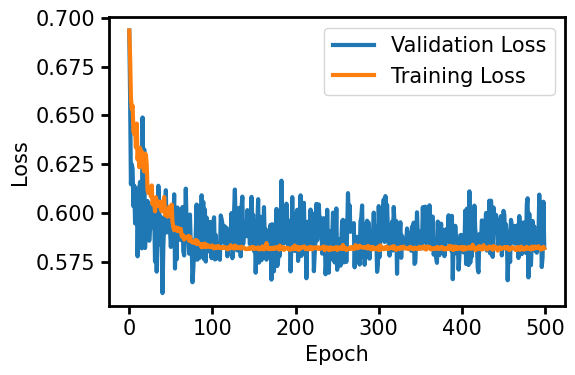

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC on the test dataset is 0.6353547604608853.
Confusion Matrix:
[[47 38]
 [35 62]]
---------------------------------------------


Progress: 100%|██████████| 500/500 [01:16<00:00,  6.58it/s, train_loss=0.595, val_loss=0.622]


-------------------Performance metrics -----------
Number of hidden layers:  16
Dropout probability:  0.5
Learning Rate: 0.001


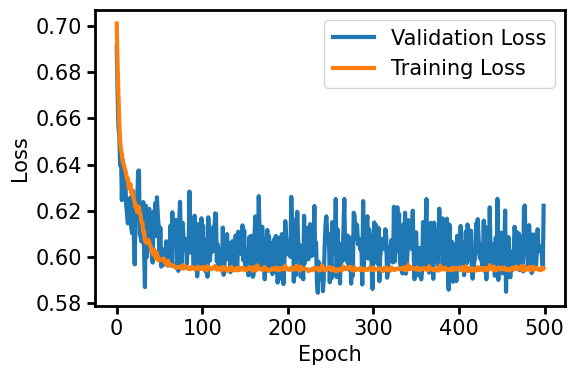

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC on the test dataset is 0.652152819890843.
Confusion Matrix:
[[53 32]
 [36 61]]
---------------------------------------------


Progress: 100%|██████████| 500/500 [01:17<00:00,  6.48it/s, train_loss=0.574, val_loss=0.628]


-------------------Performance metrics -----------
Number of hidden layers:  16
Dropout probability:  0.5
Learning Rate: 0.01


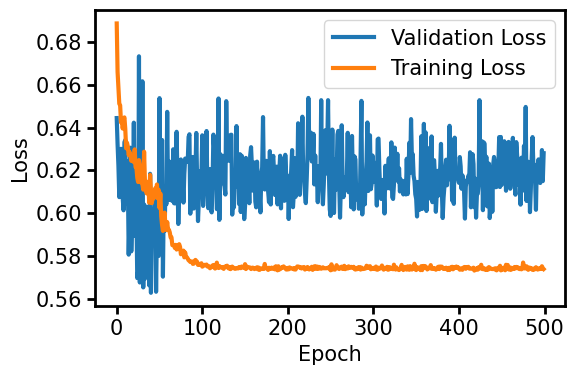

AUC on the test dataset is 0.6275924802910855.
Confusion Matrix:
[[40 45]
 [34 63]]
---------------------------------------------


In [ ]:

for hidden_layers in [8, 16]:
  for lr in [0.001, 0.01]:

    device = 'cuda:0'
    model = IDRFeatureNN_fully_connected(hidden_dim=hidden_layers).to(device)

    optimizer = torch.optim.Adam(list(model.parameters()), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, factor=0.5)

    val_loss_curve = []
    train_loss_curve = []

    # Use tqdm for progress bar
    tqdm_progress =  tqdm(range(500), desc="Progress")

    for epoch in tqdm_progress:
        # Compute train your model on training data
        epoch_loss = train(model, train_loader, optimizer,  device=device)

        # Validate your on validation data
        val_loss = validate(model, val_loader, device=device)

        # Record train and loss performance
        train_loss_curve.append(epoch_loss)
        val_loss_curve.append(val_loss)

        # The learning rate scheduler record the validation loss
        scheduler.step(val_loss)
        tqdm_progress.set_postfix(train_loss=f'{epoch_loss:.3f}', val_loss=f'{val_loss:.3f}', refresh=True)

    print ('-------------------Performance metrics -----------')
    print('Number of hidden layers: ', str(hidden_layers))
    print('Dropout probability: ', str(prob_dropout))
    print('Learning Rate:', str(lr))
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(val_loss_curve, label='Validation Loss')
    ax.plot(train_loss_curve, label='Training Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend(loc='upper right')
    fig.tight_layout()
    plt.show()

    ################ Code #################
    labels, pred_prob = evaluate(model, test_loader, device)
    test_score = roc_auc_score(labels, pred_prob)
    ################ Code #################

    print("AUC on the test dataset is {}.".format(test_score) )

    pred_label = np.zeros(len(pred_prob))
    for i in range(len(pred_prob)):
      if pred_prob[i] >= 0.5:
        pred_label[i] = 1
      else:
        pred_label[i] = 0
    conf_matrix = confusion_matrix(labels, pred_label)

    # Print confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    print ('---------------------------------------------')

## Develop model with features from ProtBERT

In [ ]:
! pip install transformers evaluate datasets requests

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
partition_ratios = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_for_IDRs/partition_ratios.csv')
# fasta_file = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_for_IDRs/full_protein_sequences.csv')

data_dict = {'Uniprot ID': [], 'Full Sequence': [], 'Log Partition Ratios': []}

for sequence in SeqIO.parse('/content/drive/My Drive/Colab Notebooks/ML_for_IDRs/full_protein_sequences.fasta', 'fasta'):
  uniprot_id = sequence.id.split('|')[1]
  data_dict['Uniprot ID'].append(uniprot_id)
  data_dict['Full Sequence'].append(str(sequence.seq))
  data_dict['Log Partition Ratios'].append(partition_ratios[partition_ratios['Uniprot ID']==uniprot_id]['Log2(average_P/S)'].values[0])

dataset_protbert = pd.DataFrame(data_dict)
dataset_protbert.head(10)

,Uniprot ID,Full Sequence,Log Partition Ratios
0,Q8WUM0,MFPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPLGSAVSSP...,10.371906
1,P62917,MGRVIRGQRKGAGSVFRAHVKHRKGAARLRAVDFAERHGYIKGIVK...,9.667730
2,Q8NFH3,MEEIYAKFVSQKISKTRWRPLPPGSLQTAETFATGSWDNEENYISL...,9.605071
3,Q9NVP1,MSHLPMKLLRKKIEKRNLKLRQRNLKFQGASNLTLSETQNGDVSEE...,9.565771
4,Q8N7H5,MAPTIQTQAQREDGHRPNSHRTLPERSGVVCRVKYCNSLPDIPFDP...,9.189393
5,Q8WUA4,MDTCGVGYVALGEAGPVGNMTVVDSPGQEVLNQLDVKTSSEMTSAE...,9.121233
6,Q8WVC0,MADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSESD...,9.007168
7,P55884,MQDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAA...,8.627768
8,Q9Y5Q8,MAAEAADLGLGAAVPVELRRERRMVCVEYPGVVRDVAKMLPTLGGE...,7.997080
9,Q13347,MKPILLQGHERSITQIKYNREGDLLFTVAKDPIVNVWYSVNGERLG...,7.988217


In [ ]:
dataset_protbert.describe()

,Log Partition Ratios
count,3275.000000
mean,-0.380056
std,3.159475
min,-9.644124
25%,-2.604476
50%,-0.432838
75%,1.829648
max,10.371906


In [ ]:
# Select only the protein sequences that have a partition ratio of > 2 or < -2 for classification
def assign_labels(pr):
  if pr > 2.0:
    return 1
  elif pr < -2.0:
    return 0
  else:
    return -1

dataset_protbert['Enrichment Label'] = dataset_protbert['Log Partition Ratios'].apply(assign_labels)

# Drop the columns that contain Enrichment Label of -1
dataset_protbert_filtered = dataset_protbert[dataset_protbert['Enrichment Label'] != -1]

dataset_protbert_filtered.head(10)

,Uniprot ID,Full Sequence,Log Partition Ratios,Enrichment Label
0,Q8WUM0,MFPAAPSPRTPGTGSRRGPLAGLGPGSTPRTASRKGLPLGSAVSSP...,10.371906,1
1,P62917,MGRVIRGQRKGAGSVFRAHVKHRKGAARLRAVDFAERHGYIKGIVK...,9.667730,1
2,Q8NFH3,MEEIYAKFVSQKISKTRWRPLPPGSLQTAETFATGSWDNEENYISL...,9.605071,1
3,Q9NVP1,MSHLPMKLLRKKIEKRNLKLRQRNLKFQGASNLTLSETQNGDVSEE...,9.565771,1
4,Q8N7H5,MAPTIQTQAQREDGHRPNSHRTLPERSGVVCRVKYCNSLPDIPFDP...,9.189393,1
5,Q8WUA4,MDTCGVGYVALGEAGPVGNMTVVDSPGQEVLNQLDVKTSSEMTSAE...,9.121233,1
6,Q8WVC0,MADMEDLFGSDADSEAERKDSDSGSDSDSDQENAASGSNASGSESD...,9.007168,1
7,P55884,MQDAENVAVPEAAEERAEPGQQQPAAEPPPAEGLLRPAGPGAPEAA...,8.627768,1
8,Q9Y5Q8,MAAEAADLGLGAAVPVELRRERRMVCVEYPGVVRDVAKMLPTLGGE...,7.997080,1
9,Q13347,MKPILLQGHERSITQIKYNREGDLLFTVAKDPIVNVWYSVNGERLG...,7.988217,1


In [ ]:
class SeqDataset(torch.utils.data.Dataset):
  '''This class is used to create a dataset for the model'''
  def __init__(self, encodings, labels):
      self.encodings = encodings
      self.labels = labels

  def __getitem__(self, idx):
      item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels'] = torch.tensor(self.labels[idx])
      return item

  def __len__(self):
      return len(self.labels)

In [ ]:
from transformers import AutoTokenizer

X = list(dataset_protbert_filtered['Full Sequence'].values)
y = list(dataset_protbert_filtered['Enrichment Label'].values)


# Do a test:train 20:80 split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, train_size=0.8)
# Divide the train set into a validation:train 10:90 split
X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, train_size=0.8)

sequence_len_df = dataset_protbert_filtered['Full Sequence'].apply(len)
max_len = int(np.median(np.quantile(sequence_len_df, 0.99)))

#Build Dataset
train_data = SeqDataset(X_train, y_train) # fill in code here
val_data = SeqDataset(X_val, y_val) # fill in code here
test_data = SeqDataset(X_test, y_test) # fill in code here

# Build DataLoader
batch_size = 16
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D", do_lower_case=False, model_max_length= max_len)
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors="pt")
dev_encodings = tokenizer(X_val, truncation=True, padding=True, return_tensors="pt")
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors="pt")

train_dataset = SeqDataset(train_encodings, y_train)
dev_dataset = SeqDataset(dev_encodings, y_val)
test_dataset = SeqDataset(test_encodings, y_test)

In [ ]:
print(len(X_train))

1146


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

!pip install evaluate


In [ ]:
! pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 979.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
! pip install accelerate -U

import evaluate
model = AutoModelForSequenceClassification.from_pretrained("facebook/esm2_t6_8M_UR50D", num_labels=2)

eps = 1
bs = 16
steps = len(train_dataset) // bs

metric = evaluate.load('accuracy')
def compute_acc(eval_pred):
    '''This function is used to compute the accuracy of the model'''
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir='./results/training_results',            # output directory
    num_train_epochs= eps,                              # total number of training epochs
    per_device_train_batch_size= bs,                    # batch size per device during training
    per_device_eval_batch_size= bs,                     # batch size for evaluation
    warmup_steps= 500,                                  # number of warmup steps for learning rate scheduler
    weight_decay= 0.01,                                 # strength of weight decay
    logging_dir= './results/training_logs',             # directory for storing logs
    logging_steps= steps,
    load_best_model_at_end= True,                       # load the best model at the end of training
    evaluation_strategy= 'epoch',
    save_strategy = 'epoch'
)

trainer = Trainer(
    model=model,                                        # the instantiated 🤗 Transformers model to be trained
    args=training_args,                                 # training arguments, defined above
    train_dataset=train_dataset,                        # training dataset
    eval_dataset=dev_dataset,                           # evaluation dataset
    compute_metrics = compute_acc,
    tokenizer=tokenizer
)

# train function starts the training
trainer.train()

# evaluate function evaluates the model on the input dataset
trainer.evaluate(test_dataset)

Some weights of EsmForSequenceClassification were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:

from transformers import TFBertModel, BertTokenizer,BertConfig
import re
import numpy as np

tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert_bfd", do_lower_case=False )

model = TFBertModel.from_pretrained("Rostlab/prot_bert_bfd", from_pt=True)

sequences_Example = data_matrix_idr_features['IDR Sequence Combined'].values

sequences_Example = [re.sub(r"[UZOB]", "X", sequence) for sequence in sequences_Example]

ids = tokenizer.batch_encode_plus(sequences_Example, add_special_tokens=True, padding=True, return_tensors="tf")

input_ids = ids['input_ids']
attention_mask = ids['attention_mask']

embedding = model(input_ids)[0]

embedding = np.asarray(embedding)

attention_mask = np.asarray(attention_mask)

features = []
for seq_num in range(len(embedding)):
  print(seq_num)
  seq_len = (attention_mask[seq_num] == 1).sum()
  seq_emd = embedding[seq_num][1:seq_len-1]
  features.append(seq_emd)

print(features)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
random = pd.DataFrame(features[:][0][:])
random.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
25%,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
50%,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
75%,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
max,0.03058,0.024316,0.136382,0.032959,-0.065275,-0.136095,-0.046492,0.032434,0.011008,-0.019854,...,0.057032,-0.042408,-0.028761,0.025556,-0.128086,-0.130842,0.026239,-0.086871,-0.114394,-0.012979
